In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/races.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_results.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/drivers.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructors.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/lap_times.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/status.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/driver_standings.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/seasons.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/pit_stops.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/sprint_results.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/constructor_standings.csv
/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/results.csv
/kaggle/input/formula-one-racing-a-comprehensive-dat

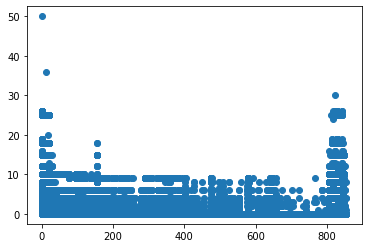

In [2]:
dataResult = pd.read_csv("/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/results.csv")
#print(dataResult)
plt.scatter(dataResult['driverId'], dataResult['points'])


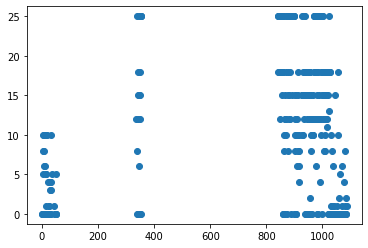

In [3]:
dataResultVettel = dataResult[dataResult['driverId'] == 20] # On choisit le pilote Vettel
plt.scatter(dataResultVettel['raceId'], dataResultVettel['points'])


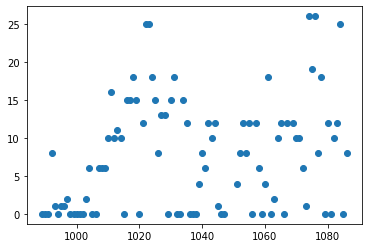

In [4]:
dataResultLeclerc = dataResult[dataResult['driverId'] == 844] # On choisit le pilote Leclerc
plt.scatter(dataResultLeclerc['raceId'], dataResultLeclerc['points'])

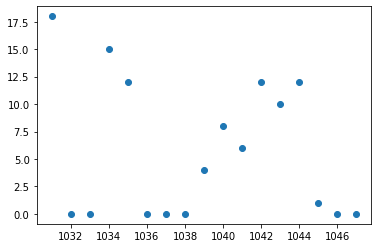

In [5]:
dataResultLeclerc = dataResult[dataResult['driverId'] == 844] # On choisit le pilote Leclerc
dataRace = pd.read_csv("/kaggle/input/formula-one-racing-a-comprehensive-data-analysis/races.csv")
dataResultRaceLeclerc2020 = pd.merge(dataResultLeclerc,dataRace[['raceId', 'name', 'year', 'circuitId']],how='left',on='raceId')
dataResultRaceLeclerc2020 = dataResultRaceLeclerc2020[dataResultRaceLeclerc2020['year'] == 2020] # On choisit la saison 2020

plt.scatter(dataResultRaceLeclerc2020['raceId'], dataResultRaceLeclerc2020['points'])

In [6]:
#Regression linéaire simple
dataResultRegressionSimple = dataResult
dataResultRegressionSimple = dataResultRegressionSimple.replace(['\\N', 'F', 'R'], [0, 0, 0])
dataTemp = dataResultRegressionSimple.get(['driverId', 'points'])

print(dataTemp)

X = dataTemp.iloc[:,:-1].values
Y = dataTemp.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

print(X_train)



       driverId  points
0             1    10.0
1             2     8.0
2             3     6.0
3             4     5.0
4             5     4.0
...         ...     ...
25655       825     0.0
25656       848     0.0
25657       849     0.0
25658       852     0.0
25659       822     0.0

[25660 rows x 2 columns]
X_train shape : (21811, 1)
y_train shape : (21811,)
X_test shape : (3849, 1)
y_test shape : (3849,)
[[140]
 [817]
 [ 44]
 ...
 [ 30]
 [176]
 [ 84]]


In [7]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

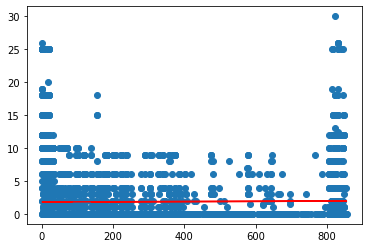

In [8]:
#plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_train, regression.predict(X_train), color='red')